In [82]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eet3.jpeg to eet3 (1).jpeg
Saving eet.jpg to eet (3).jpg
User uploaded file "eet3.jpeg" with length 93840 bytes
User uploaded file "eet.jpg" with length 40418 bytes


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [100]:
img = mpimg.imread('eet.jpg')
print(img)

[[[ 43  96 174]
  [ 87  99 185]
  [ 82  92 181]
  ...
  [ 35  52  68]
  [ 65  89  99]
  [ 83 113 124]]

 [[ 65 115 150]
  [106 118 134]
  [125 133 144]
  ...
  [ 86 105 122]
  [ 78 104 117]
  [ 75 107 122]]

 [[ 62 100 175]
  [ 93  96 103]
  [ 95  93  68]
  ...
  [ 73  92 109]
  [ 71  94 108]
  [ 71 100 114]]

 ...

 [[ 54  57  66]
  [ 58  68  80]
  [ 69  85 100]
  ...
  [ 32  38  38]
  [ 33  39  39]
  [ 33  39  39]]

 [[ 44  38  42]
  [ 33  36  43]
  [ 48  57  66]
  ...
  [ 20  26  26]
  [ 21  27  27]
  [ 21  27  27]]

 [[ 16   4   4]
  [  1   0   2]
  [ 16  21  27]
  ...
  [ 36  42  42]
  [ 34  40  40]
  [ 32  38  38]]]


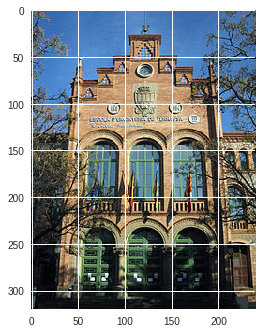

In [101]:
imgplot = plt.imshow(img)

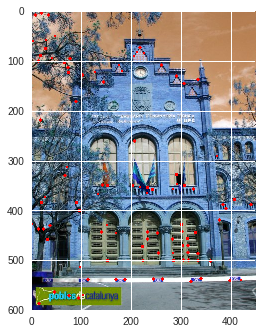

(<matplotlib.image.AxesImage at 0x7f0cba750470>, None)

In [102]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('eet3.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

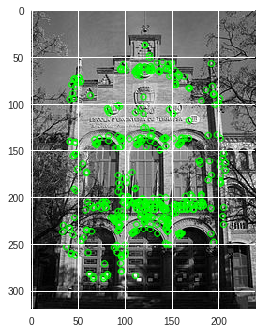

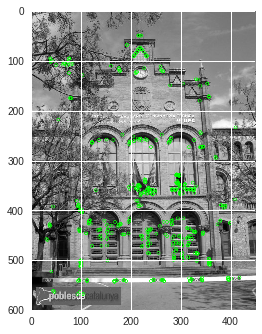

(<matplotlib.image.AxesImage at 0x7f0cba78cb38>, None)

In [104]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

im1 = cv.imread('eet.jpg',0)
im2 = cv.imread('eet3.jpeg',0)
# Initiate STAR detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp1, des1 = orb.detectAndCompute(im1,None)
kp2, des2 = orb.detectAndCompute(im2,None)

# draw only keypoints location,not size and orientation
img1 = cv.drawKeypoints(im1,kp1, color=(0,255,0), flags=0, outImage=np.array([]))
img2 = cv.drawKeypoints(im2,kp2, color=(0,255,0), flags=0, outImage=np.array([]))
plt.imshow(img1),plt.show()
plt.imshow(img2),plt.show()


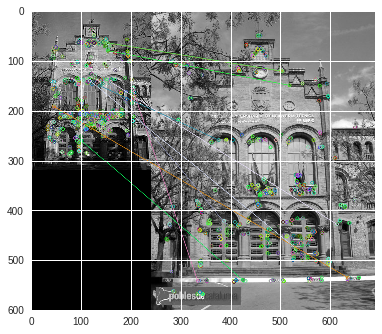

(<matplotlib.image.AxesImage at 0x7f0cbaa426a0>, None)

In [105]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None)
plt.imshow(img3),plt.show()